In [49]:
!pip install yellowbrick
!pip install gradio

You should consider upgrading via the 'C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 6.1/6.1 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 57.4/57.4 KB 501.3 kB/s eta 0:00:00
     -------------------------------------- 84.8/84.8 KB 956.5 kB/s eta 0:00:00
     -------------------------------------- 54.9/54.9 KB 474.6 kB/s eta 0:00:00
     -------------------------------------- 212.9/212.9 KB 1.3 MB/s eta 0:00:00
     ------------------------------------ 554.9/554.9 KB 892.9 kB/s eta 0:00:00
     -------------------------------------- 84.5/84.5 KB 952.6 kB/s eta 0:00:00
     -------------------------------------- 98.6/98.6 KB 950.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.9/1.9 MB 802.8 kB/s eta 0:00:00
     ------------------------------------ 197.5/197.5 KB 917.8 kB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ---------------------------------------- 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [50]:
from sklearn.cluster             import KMeans
from yellowbrick.cluster         import KElbowVisualizer
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import gradio            as gr


In [3]:
# Configurando a exibição do pandas
pd.options.display.max_columns = 150
pd.options.display.float_format = "{:.2f}".format

In [4]:
# Abrindo o arquivo csv com os dados
data = pd.read_csv('./data/data-final.csv', sep='\t')

In [5]:
# Fazendo uma pré visualização da tabela
sample_view = data.sample(n=10)
sample_view

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
303921,3.00,1.00,4.00,2.00,4.00,2.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,2.00,4.00,2.00,2.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,5.00,4.00,2.00,3.00,3.00,3.00,4.00,3.00,4.00,2.00,3.00,3.00,6479.00,3394.00,3001.00,2679.00,1656.00,2598.00,5919.00,2578.00,2619.00,3742.00,1574.00,5956.00,1816.00,5470.00,4324.00,2621.00,2401.00,8941.00,3768.00,2297.00,3570.00,2898.00,3796.00,2217.00,2569.00,3765.00,3884.00,3800.00,2098.00,2351.00,2178.00,1998.00,1709.00,3974.00,2765.00,2920.00,2011.00,33514.00,2717.00,4279.00,1497.00,2839.00,2291.00,2250.00,2219.00,4075.00,3231.00,3668.00,3156.00,2233.00,2016-12-25 18:37:42,1536.00,864.00,1553.00,193.00,7,2,US,44.6089,-87.4326
649255,1.00,4.00,2.00,5.00,3.00,3.00,1.00,5.00,2.00,5.00,5.00,1.00,5.00,1.00,5.00,5.00,4.00,5.00,5.00,5.00,3.00,4.00,4.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,3.00,4.00,4.00,4.00,5.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00,5.00,3.00,3.00,3.00,2.00,5.00,4.00,3.00,5906.00,7828.00,6125.00,3962.00,1692.00,1413.00,3897.00,2570.00,4137.00,6689.00,3269.00,7803.00,1284.00,4638.00,1818.00,2636.00,2560.00,2206.00,3024.00,3866.00,2337.00,7202.00,2619.00,1007.00,3343.00,9212.00,4223.00,3953.00,2166.00,1339.00,5478.00,4218.00,4685.00,2946.00,3876.00,2069.00,979.00,1991.00,1964.00,2388.00,3195.00,2988.00,1625.00,1711.00,1633.00,1731.00,3675.00,3682.00,2880.00,1452.00,2018-03-12 05:37:51,1366.00,768.00,9.00,171.00,9,35,US,41.0978,-73.5188
657285,3.00,2.00,3.00,3.00,2.00,2.00,3.00,3.00,4.00,4.00,4.00,3.00,5.00,2.00,4.00,3.00,4.00,4.00,4.00,2.00,1.00,3.00,4.00,4.00,3.00,4.00,2.00,4.00,3.00,3.00,4.00,2.00,4.00,1.00,2.00,2.00,4.00,2.00,3.00,5.00,2.00,4.00,4.00,4.00,4.00,1.00,3.00,2.00,4.00,4.00,14374.00,3012.00,2689.00,27061.00,3909.00,2536.00,5012.00,2442.00,7908.00,2260.00,2072.00,1464.00,27435.00,11615.00,2168.00,2772.00,1071.00,13036.00,2048.00,1542.00,2653.00,5336.00,3915.00,7892.00,10647.00,2937.00,5232.00,4872.00,19052.00,2037.00,3184.00,3268.00,3092.00,8049.00,2290.00,2410.00,2994.00,16050.00,5042.00,6673.00,2456.00,4367.00,2412.00,8633.00,1727.00,1964.00,2279.00,3092.00,1499.00,1402.00,2018-03-17 19:54:07,1920.00,1080.00,6.00,285.00,19,1,US,34.4853,-97.8522
368395,2.00,5.00,2.00,4.00,2.00,4.00,2.00,5.00,2.00,5.00,4.00,3.00,5.00,2.00,3.00,2.00,2.00,1.00,2.00,3.00,1.00,3.00,2.00,4.00,2.00,5.00,3.00,5.00,3.00,3.00,4.00,4.00,4.00,3.00,2.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,3.00,4.00,4.00,4.00,2.00,3.00,3615.00,1333.00,1363.00,9264.00,1813.00,1922.00,2137.00,2274.00,2568.00,2352.00,1421.00,1765.00,3686.00,1323.00,2843.00,2029.00,3255.00,2196.00,1393.00,2607.00,1754.00,2049.00,1784.00,2892.00,3342.00,1450.00,2970.00,2940.00,3274.00,2511.00,2147.00,2196.00,1961.00,2128.00,1275.00,1657.00,1519.00,3657.00,1636.00,1735.00,1609.00,3903.00,5314.00,3392.00,1009.00,1990.00,1618.00,4332.00,2558.00,1178.00,2017-03-07 17:24:43,1366.00,768.00,5700.00,124.00,5,1,US,33.7884,-84.3491
36115,4.00,4.00,3.00,4.00,4.00,4.00,2.00,1.00,3.00,5.00,5.00,5.00,5.00,1.00,1.00,2.00,4.00,2.00,5.00,5.00,2.00,4.00,1.00,5.00,4.00,5.00,1.00,5.00,5.00,5.00,2.00,1.00,5.00,4.00,2.00,1.00,5.00,5.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,5.00,5.00,5.00,3188.00,1592.00,6512.00,1567.00,1759.00,2857.00,4880.00,5512.00,3784.00,1408.00,3255.00,108

In [6]:
# Para fins do projeto, iremos nos limitar a buscar apenas as informações concernentes às perguntas do questionário
# Para tanto, faremos um recorte do DataFrame inteiro;
# Primeiro, entretanto, precisamos identificar o index das colunas que não nos interessa;
# Como só nos interessa as perguntas, todas as colunas a partir da coluna EXT1_E podem ser eliminadas;
index_lim = data.columns.get_loc("EXT1_E")
index_lim

50

In [7]:
# Dessa forma teremos uma df que é recorte:
df = data.drop(data.columns[50:], axis=1)

In [8]:
# Agora podemos fazer uma análise estatística dos nossos dados, com o describe:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [9]:
# Verificando a contagem de registros por valor
df['EXT1'].value_counts()

3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: EXT1, dtype: int64

In [10]:
# Selecionando o total de registros com valor 0, uma vez que 0 não é uma opção válida de resposta para o teste
df[(df == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
# Limpando, enfim, os valores 0
df = df[(df > 0.00).all(axis=1)]

In [13]:
# Podemos observar que a tabela não possui mais valores zerados.
df['EXT1'].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

In [ ]:
# Agora o próximo passo é definir o número de clusters que nós queremos
# Como nossa base de dados parte de um lugar que identifica 5 traços de personalidade, nada mais justo que o valor
# escolido seja 5

In [17]:
# Instanciando os métodos KMeans e Visualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [22]:
# Selecionando uma amostra aletória para executar o Elbow
data_sample = df.sample(n=5000, random_state=1)

In [27]:
# Executando o teste
visualizer.fit(data_sample)
visualizer.poof()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Com o teste fica claro que o número ideal de agrupamentos seria 5

In [28]:
# Atribuindo os registros aos devidos grupos 
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)

In [38]:
# Agora podemos simplesmente inserir os rótulos dos clusters no dataframe
predicoes = k_fit.labels_
df['Clusters'] = predicoes

In [31]:
# Vamos ver como ficou
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,3
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,4
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,3


In [ ]:
# Beleza, mas e agora? Bom, agora que já possuímos os nossos grupos, podemos ver qual a média de resposta em cada categoria
# de perguntas por grupo e saber, por exemplo, qual é o tipode pergunta que mais define tal e tal grupo;
# São 5 tipos de resposta, sendo 10 perguntas para cada.

In [32]:
# Selecionando as colunas de cada grupo
col_list = list(df)
ext      = col_list[0:10]
est      = col_list[10:20]
agr      = col_list[20:30]
csn      = col_list[30:40]
opn      = col_list[40:50]

In [40]:
# Tirando a média de cada grupo
data_mean = pd.DataFrame()
data_mean['extroversion']      = df[ext].sum(axis=1)/10
data_mean['neurotic']          = df[est].sum(axis=1)/10
data_mean['agreeable']         = df[agr].sum(axis=1)/10
data_mean['conscientious']     = df[csn].sum(axis=1)/10
data_mean['open']              = df[opn].sum(axis=1)/10
data_mean['clusters']          = predicoes

In [41]:
# Vamos ver como ficou
data_mean.head()

,extroversion,neurotic,agreeable,conscientious,open,clusters
0,3.00,2.40,3.10,3.20,3.30,3
1,3.40,2.10,3.20,3.10,2.70,4
2,2.90,2.60,2.80,2.80,3.10,4
3,2.60,2.70,3.20,2.70,3.10,1
4,3.50,2.30,3.00,3.20,3.60,3


In [42]:
# Se agruparmos por cluster, vamos ter uma boa noção do tipo de resposta para cada categoria
data_mean.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.07,3.44,3.31,3.22,3.37
1,3.00,2.63,2.95,3.03,3.26
2,2.97,3.66,3.16,3.18,3.25
3,3.09,2.43,3.21,3.11,3.34
4,3.06,2.99,3.19,3.16,3.24


In [44]:
data_clusters = data_mean.groupby('clusters').mean()

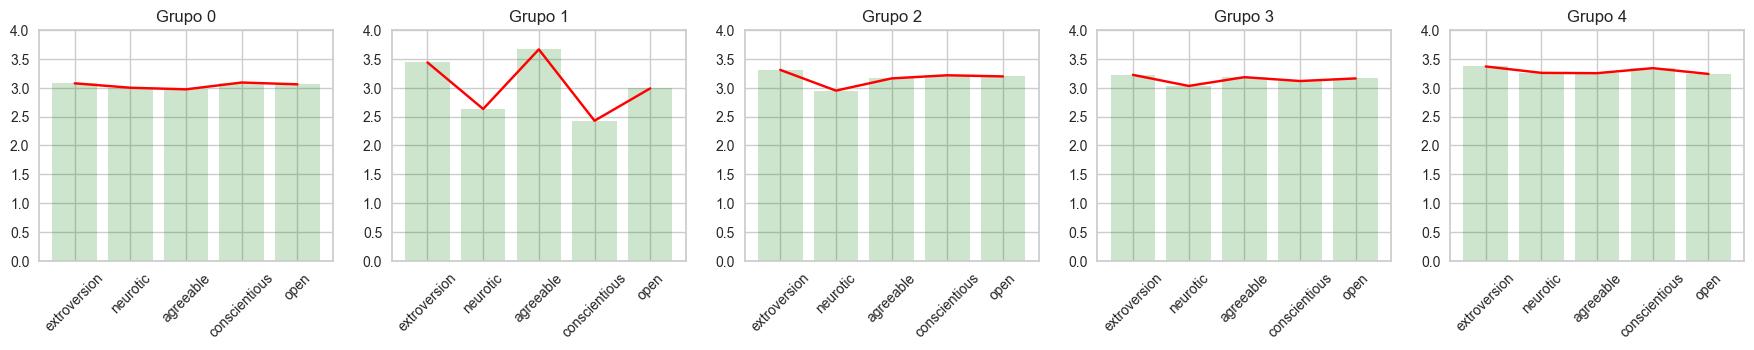

In [48]:
# Para termos uma melhor noção desse resultado, convém fazer uma visualização
plt.figure(figsize=(22,3))
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
  plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
  plt.title('Grupo '+str(i))
  plt.xticks(rotation=45)
  plt.ylim(0,4)


In [ ]:
# Usaremos a biblioteca gradio para criar uma interface para nosso código.

In [51]:
# Lendo as questões do questionário
dicio_questions = open('./data/questions.txt').read().split("\n")

In [53]:
# Recuperando apenas o que for questão
questions = []
for q in dicio_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())